# 1. Zaimportowanie koniecznych bibliotek

In [16]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

from truck_system import *
from fuzzy_set import *
from fuzzy_controller import *
from generate_data import generate_data, load_data
from NeuralNet import *

# 2. Zdefiniowanie zbiorów rozmytych


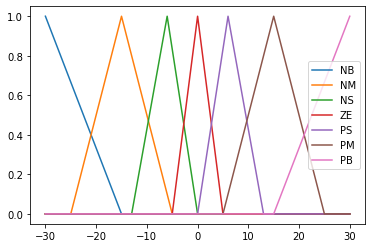

In [50]:
%matplotlib inline
xSet = FuzzySet(0, 100, 0.1)
xSet.trampf(-10,0,10,35, "LE")
xSet.trimf(30,40,50, "LC")
xSet.trimf(45,50,55, "CE")
xSet.trimf(50,60,70, "RC")
xSet.trampf(65,90,100,110, "RI")

ϕSet = FuzzySet(-90,270,0.1)
ϕSet.trimf(-100,-45,10,'RB')
ϕSet.trimf(-10,25,58,'RU')
ϕSet.trimf(42, 66, 90,'RV')
ϕSet.trimf(80,90,100,'VE')
ϕSet.trimf(90,112,135,'LV')
ϕSet.trimf(125,160,190,'LU')
ϕSet.trimf(165,225,280,'LB')

θSet = FuzzySet(-30,30,0.1)
θSet.trimf(-45,-30,-15,"NB")
θSet.trimf(-25,-15,-5,"NM")
θSet.trimf(-13,-6,0,"NS")
θSet.trimf(-5,0,5,"ZE")
θSet.trimf(0,6,13,"PS")
θSet.trimf(5,15,25,"PM")
θSet.trimf(15,30,45,"PB")


# xSet.plot(['LE', "CE", "RI"])
# xSet.plot()
# xSet.plot()
# ϕSet.plot()
θSet.plot()

# 3. Ustawienie kontrolera rozmytego (poprzedniki, następnik, reguły)

In [18]:
FC = FuzzyController()
FC.add_antecedant('x', xSet)
FC.add_antecedant('phi', ϕSet)
FC.set_consequent('theta', θSet)
FC.read_rules_from_file()
FC.print_rules()

   RB RU RV VE LV LU LB 
LE PS NS NM NM NB NB NB 
LC PM PS NS NM NM NB NB 
CE PM PM PS ZE NS NM NM 
RC PB PB PM PM PS NS NM 
RI PB PB PB PM PM PS NS 


# 4. Generowanie danych

In [4]:
x_positions = 4
y_positions = 4
phi_positions = 16

generate_data(FC, x_positions, y_positions, phi_positions, "new.txt")

# 5. Inicjalizacja i uczenie sieci neuronowej z wygenerowanych danych

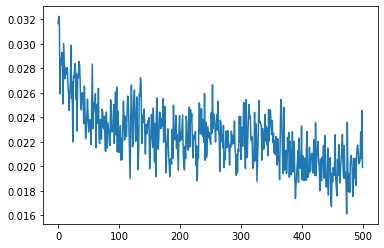

In [21]:
%matplotlib inline
net = Network(3)
net.addLayer(12)
net.addLayer(35)
net.addLayer(2)
net.addLayer(1)

X, y = load_data("new.txt")
lr = 0.1
err = learn_net(net, X, y, 500, 1000, lr)
plt.plot(np.arange(0,len(err)), err)
plt.show()

# 6. Symulacja

In [48]:
# przykladowe parametry, position=None powoduje losowanie pozycji
position = [45,76,90] #[phi, x, y]
# wielkosc kroku
dt = 2

<IPython.core.display.Javascript object>


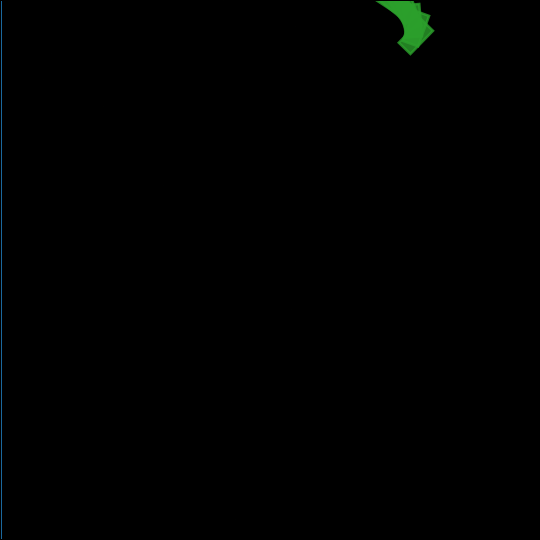

In [49]:
%matplotlib notebook
drive(FC, 'fuzzy', dt=dt, initial_position=position)

<IPython.core.display.Javascript object>


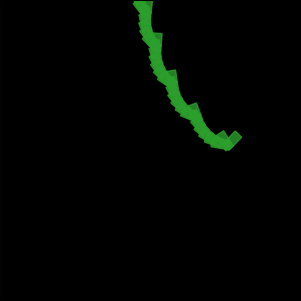

In [42]:
%matplotlib notebook
drive(net, 'neural_1', dt=dt, initial_position=position)

<IPython.core.display.Javascript object>


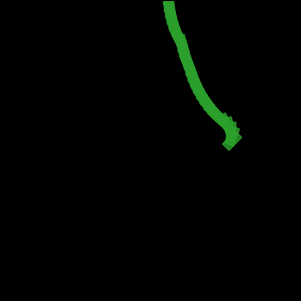

In [43]:
%matplotlib notebook
drive(net, 'neural_2', dt=dt, initial_position=position)